In [1]:
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import kcorrect.kcorrect
import matplotlib.pyplot as plt

### K Correction

In this algorithm the k correction is performed on the SDSS Main Sample of galaxies using the KCORRECT code (M. Blanton).

https://kcorrect.readthedocs.io/en/5.1.1/index.html

##### Work with the data

Load the data from the Main Sample of galaxies, perform an analysis to discard values that may affect the fit.

In [2]:
MSG = pd.read_csv('MSG.csv')

In [4]:
MSG.describe()

,objID,redshift,modelMag_u,modelMagErr_u,extinction_u,modelMag_g,modelMagErr_g,extinction_g,modelMag_r,modelMagErr_r,extinction_r,modelMag_i,modelMagErr_i,extinction_i,modelMag_z,modelMagErr_z,extinction_z
count,4.511920e+05,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000,451192.000000
mean,5.878154e+17,0.106160,19.323185,-0.053327,0.157107,17.694881,-0.036077,0.115598,16.842645,0.005711,0.083841,16.416815,0.006066,0.063574,16.015100,-0.075174,0.045075
std,1.807697e+14,0.046309,36.545389,36.463173,0.096939,21.102996,21.051891,0.071327,0.681487,0.001854,0.051732,0.680443,0.028864,0.039227,29.827599,29.771807,0.027812
min,5.877230e+17,0.030000,-9999.000000,-9999.000000,0.015224,-9999.000000,-9999.000000,0.011202,11.968400,0.001616,0.008124,11.611060,0.001627,0.006161,-9999.000000,-9999.000000,0.004368
25%,5.877321e+17,0.071358,18.867270,0.041149,0.091598,17.317967,0.005851,0.067397,16.497530,0.004540,0.048882,16.077240,0.004554,0.037066,15.757867,0.009855,0.026280
50%,5.877389e+17,0.099826,19.535880,0.063827,0.134588,17.888150,0.007690,0.099029,17.018980,0.005717,0.071824,16.587025,0.005724,0.054462,16.267290,0.013028,0.038614
75%,5.877429e+17,0.135472,20.130620,0.096900,0.197751,18.299762,0.009643,0.145504,17.360920,0.006722,0.105531,16.922070,0.006776,0.080021,16.602240,0.016147,0.056736
max,5.888489e+17,0.299798,30.842740,9.691940,1.776414,28.652290,6.875753,1.307069,18.528120,0.048812,0.947995,28.298760,5.652611,0.718836,27.289790,5.440267,0.509664


In [3]:
MSG = MSG[(MSG['modelMag_u']>0)&
          (MSG['modelMagErr_u']>0)&
          (MSG['modelMag_g']>0)&
          (MSG['modelMagErr_g']>0)&
          (MSG['modelMag_r']>0)&
          (MSG['modelMagErr_r']>0)&
          (MSG['modelMag_z']>0)&
          (MSG['modelMagErr_z']>0)&
          (MSG['modelMag_i']>0)&
          (MSG['modelMagErr_i']>0)]

In [5]:
MSG

,objID,redshift,modelMag_u,modelMagErr_u,extinction_u,modelMag_g,modelMagErr_g,extinction_g,modelMag_r,modelMagErr_r,extinction_r,modelMag_i,modelMagErr_i,extinction_i,modelMag_z,modelMagErr_z,extinction_z
0,587722981744902300,0.088799,19.91550,0.063814,0.181282,17.97751,0.007791,0.133385,17.02798,0.005058,0.096742,16.57997,0.005046,0.073357,16.22250,0.010181,0.052011
1,587722981744967759,0.146446,20.71007,0.124666,0.178553,18.48612,0.010869,0.131377,17.35504,0.006009,0.095286,16.88805,0.005959,0.072252,16.55814,0.012471,0.051228
2,587722981744967771,0.152083,20.55222,0.106713,0.178781,18.53510,0.010961,0.131545,17.40557,0.006071,0.095408,16.92069,0.005953,0.072345,16.55273,0.012153,0.051293
3,587722981744967809,0.147064,20.01891,0.063431,0.171515,18.19122,0.009128,0.126199,17.32281,0.006673,0.091530,16.94052,0.007052,0.069405,16.67728,0.013312,0.049209
4,587722981744967811,0.143732,19.36153,0.043162,0.171860,18.04230,0.008239,0.126453,17.30386,0.005816,0.091714,16.83807,0.005826,0.069544,16.58002,0.013282,0.049308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451187,588848901007933476,0.034861,16.92802,0.014284,0.270167,15.30444,0.002678,0.198787,14.61557,0.002387,0.144177,14.26663,0.002553,0.109325,14.00773,0.004705,0.077513
451188,588848901007933710,0.107974,18.97975,0.059680,0.249048,17.58811,0.006549,0.183247,16.82364,0.005320,0.132906,16.43360,0.006031,0.100779,16.16250,0.014108,0.071453
451189,588848901008064671,0.038900,17.42803,0.016235,0.257063,15.54256,0.002684,0.189144,14.68228,0.002259,0.137183,14.26233,0.002344,0.104022,13.95460,0.003814,0.073753
451190,588848901008064775,0.052316,18.26569,0.026392,0.281060,16.96636,0.005081,0.206801,16.41017,0.004230,0.149989,16.11516,0.004974,0.113733,15.90681,0.011768,0.080638


##### Definition of the parameters

Redshift, magnitudes to convert to maggies, magnitude errors and extinction.

In [4]:
redshift = MSG['redshift']

In [5]:
mag = MSG[['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]

In [6]:
mag_err = MSG[['modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i', 'modelMagErr_z']]

In [7]:
extinction = MSG[['extinction_u', 'extinction_g', 'extinction_r', 'extinction_i', 'extinction_z']]

##### Use function to convert SDSS magnitudes to maggies

In [8]:
magg = kcorrect.utils.sdss_asinh_to_maggies(mag = mag, mag_err = mag_err, extinction = extinction)

##### Definition of the coeffs

In [9]:
maggies = magg[0]

In [10]:
ivar = magg[1]

In [11]:
responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']
kc = kcorrect.kcorrect.Kcorrect(responses=responses)

In [12]:
coeffs = kc.fit_coeffs(redshift=redshift, maggies=maggies, ivar=ivar)


 NNLS quitting on iteration count.

 NNLS quitting on iteration count.


##### Calculate the k corrections and absolute magnitudes

In [13]:
k = kc.kcorrect(redshift=redshift, coeffs=coeffs)

In [14]:
k

array([[ 0.34403875,  0.26074302,  0.12298186,  0.06306707,  0.05759904],
       [ 0.60302866,  0.5179493 ,  0.18472788,  0.10809202,  0.06303394],
       [ 0.6286185 ,  0.5270455 ,  0.20995863,  0.11474054,  0.08742559],
       ...,
       [ 0.13719721,  0.10453953,  0.04461266,  0.02998765,  0.01918867],
       [ 0.14076082,  0.06242667,  0.05594682, -0.02488125, -0.00435846],
       [ 0.1178567 ,  0.07481743,  0.06152232,  0.01279737,  0.01719987]],
      dtype=float32)

In [16]:
ku = k[:, 0]

In [17]:
kg = k[:, 1]

In [18]:
kr = k[:, 2]

In [19]:
ki = k[:, 3]

In [20]:
kz = k[:, 4]

In [21]:
absmag = kc.absmag(redshift=redshift, maggies=maggies, ivar=ivar, coeffs=coeffs)

In [23]:
absmag_u = absmag[:, 0]

In [24]:
absmag_g = absmag[:, 1]

In [25]:
absmag_r = absmag[:, 2]

In [26]:
absmag_i = absmag[:, 3]

In [27]:
absmag_z = absmag[:, 4]

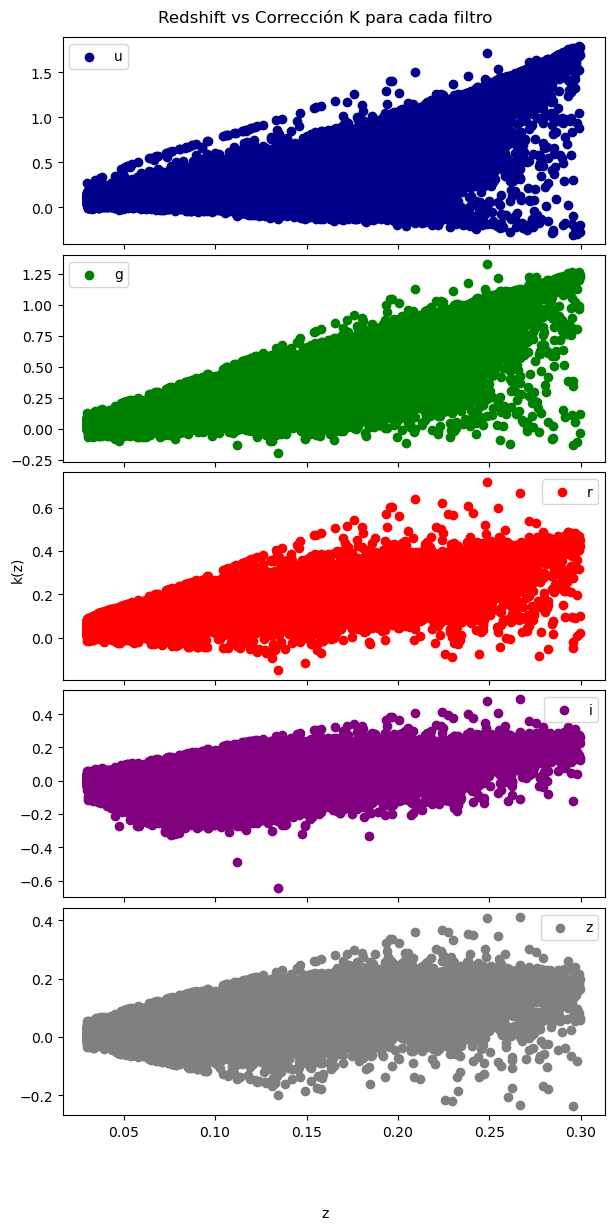

In [23]:
#plot z vs kcorrection

#Datos
kcorrect_u = ku
kcorrect_g = kg
kcorrect_r = kr
kcorrect_i = ki
kcorrect_z = kz
redshifts = redshift

#subplots
fig, axs = plt.subplots(5, 1, figsize=(7, 14), sharex=True)

#crear los graficos
axs[0].scatter(redshifts, kcorrect_u, label='u', color='darkblue')
axs[1].scatter(redshifts, kcorrect_g, label='g', color='green')
axs[2].scatter(redshifts, kcorrect_r, label='r', color='red')
axs[3].scatter(redshifts, kcorrect_i, label='i', color='purple')
axs[4].scatter(redshifts, kcorrect_z, label='z', color='grey')

#Labels y titulo
fig.suptitle('Redshift vs Corrección K para cada filtro', y=0.9)
fig.text(0.5, 0.04, 'z', ha='center', va='center')
fig.text(0.06, 0.5, 'k(z)', ha='center', va='center', rotation='vertical')

#mostrar leyendas
for ax in axs:
    ax.legend()
    
plt.subplots_adjust(hspace=0.05)

#mostrar gráfica
plt.show()

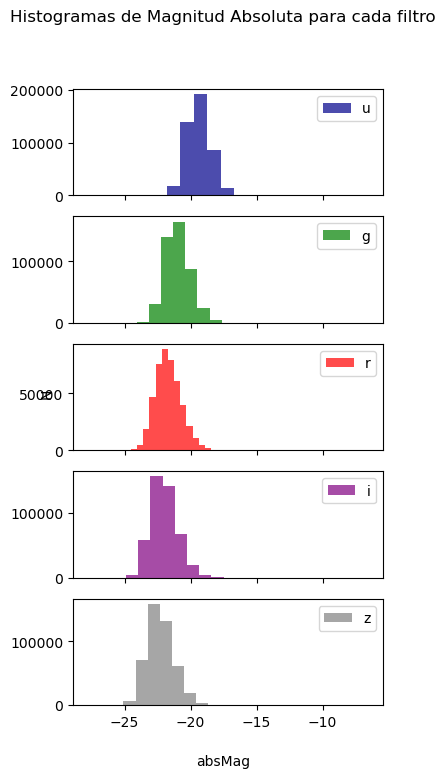

In [44]:
#plot z vs absmag

#Datos
absmag_u = absmag_u 
absmag_g = absmag_g
absmag_r = absmag_r
absmag_i = absmag_i
absmag_z = absmag_z
redshifts = redshift

# Subgráficos
fig, axs = plt.subplots(5, 1, figsize=(4, 8), sharex=True)

# Crear histogramas
axs[0].hist(absmag_u, bins=20, color='darkblue', alpha=0.7, label='u')
axs[1].hist(absmag_g, bins=20, color='green', alpha=0.7, label='g')
axs[2].hist(absmag_r, bins=20, color='red', alpha=0.7, label='r')
axs[3].hist(absmag_i, bins=20, color='purple', alpha=0.7, label='i')
axs[4].hist(absmag_z, bins=20, color='grey', alpha=0.7, label='z')

# Etiquetas y título
fig.suptitle('Histogramas de Magnitud Absoluta para cada filtro')
fig.text(0.5, 0.04, 'absMag', ha='center', va='center')
fig.text(0.06, 0.5, 'N', ha='center', va='center', rotation='vertical')

# Mostrar leyendas
for ax in axs:
    ax.legend()

# Mostrar gráfica
plt.show()



##### Absolute magnitudes without kcorrection

Cosmology definition and distances estimation using astropy

In [32]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.2)

In [33]:
LD = cosmo.luminosity_distance(MSG['redshift'])

In [34]:
LD

0         408.389146
1         702.459183
2         732.388991
3         705.730429
4         688.122575
             ...    
451187    153.689429
451188    503.746095
451189    172.053767
451190    233.892730
451191    176.420052
Name: redshift, Length: 451181, dtype: float64

In [41]:
Comoving_dist = cosmo.comoving_distance(MSG['redshift'])

In [42]:
Comoving_dist

<Quantity [375.08208246, 612.72766701, 635.7085302 , ..., 165.6115442 ,
           222.26474953, 169.6581562 ] Mpc>

In [43]:
type(Comoving_dist)

astropy.units.quantity.Quantity

##### Absolute magnitude